In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
# Save all the file names in the path as strings to a list
path="/Users/ecasiano/Desktop/PrototypeScripts/TestSystematicError/"
filenames_all = os.listdir(path)

# Set desired total number of particles
L_want = 4
N_want = 4
l_want = 2
beta_want = 4.000000
bins_want = 100000
D_want = 1
U_want = 3.300000
t_want = 1.000000

# Saves the files relevant to P(n) & S2(n) calculation
files_PnSquared = []
files_SWAPn = []
files_Pn = []

# Iterate over all filenames in path
for filename in filenames_all:
    
    # Extract parameter information from file name
    parameters = filename.split("_")
    
    if parameters[0]=='1D' or parameters[0]=='2D' or parameters[0]=='3D':
    
        D = int((parameters[0])[0]) # hypercube dimension
        L = int(parameters[1]) # hypercube linear size
        N = int(parameters[2]) # total particles
        l = int(parameters[3]) # subsystem linear size (actually l_max)
        U = float(parameters[4]) # interaction potential
        t = float(parameters[5]) # tunneling parameter
        beta = float(parameters[6]) # imaginary time length (K_B*T)**(-1)
        bins_wanted = int(parameters[7]) # number of bins saved in file
        filetype = (parameters[8]).split("-mA") # identifies the data stored in file
        seed = int(parameters[9].split(".")[0]) # random seed used
        
        mA_sector_wanted = 2
        
        if filetype[0]=='PnSquared' and int(filetype[1])==mA_sector_wanted:
            
            # Set parameters of simulations from differenet seeds we want to evaluate [D,L,N,l,U,t,beta,bins,type]
            parameters_to_evaluate = [D_want,
                                      L_want,
                                      N_want,
                                      l_want,
                                      U_want,
                                      t_want,
                                      beta_want,
                                      bins_want,
                                      'PnSquared']

            if [D,L,N,l,U,t,beta,bins_wanted,filetype[0]] == parameters_to_evaluate:
                if os.stat(path+filename).st_size > 0:
                    with open(path+filename) as f:
                       count = sum(1 for _ in f)
                    if count == bins_wanted: # only consider files that managed to save number of bins wanted
                        files_PnSquared.append(filename)
                        
                        filename_splitted = filename.split('_')
                        filename_splitted[8] = 'Pn-mA'+str(mA_sector_wanted)
                        filename_Pn = "_".join(filename_splitted)
                        files_Pn.append(filename_Pn)
                        
                        filename_splitted = filename.split('_')
                        filename_splitted[8] = 'SWAPn-mA'+str(mA_sector_wanted)
                        filename_SWAPn = "_".join(filename_splitted)
                        files_SWAPn.append(filename_SWAPn)
                        
# Get total number of seeds 
number_of_seeds = len(files_PnSquared)

### Jacknife notes

In [3]:
# # SWAP_col_sums = np.zeros((number_of_seeds,N_want+1))
# # Pn_squared_l_col_sums = np.zeros((number_of_seeds,N_want+1))
# S2n_seeds = np.zeros((number_of_seeds,N+1))
# S2n_seeds_err = np.zeros((number_of_seeds+1))
# for s in range(number_of_seeds):
#     data_SWAPn = np.loadtxt(path+files_SWAPn[s])
#     SWAP_col_sums = np.sum(data_SWAPn,axis=0)
    
#     data_PnSquared = np.loadtxt(path+files_PnSquared[s])
#     Pn_squared_l_col_sums = np.sum(data_PnSquared,axis=0)
    
#     S2n_i = np.zeros(data_SWAPn.shape)
#     for i in range(data_SWAPn.shape[0]):
#         jacknifed_SWAPn = SWAP_col_sums - data_SWAPn[i]
#         jacknifed_PnSquared = Pn_squared_l_col_sums - data_PnSquared[i]
        
#         S2n_i[i] = -np.log(jacknifed_SWAPn/jacknifed_PnSquared)
    
#     S2n = np.mean(S2n_i,axis=0)
#     N_rows = S2n.shape[0]
#     S2n_err = np.std(S2n,axis=0)
#     S2n_err *= np.sqrt(N_rows-1)
    
#     S2n_seeds[s] = S2n
#     S2n_seeds_err[s] = S2n_err

In [4]:
number_of_seeds

94

### Get mean of numerators and denominators for each seed

In [20]:
SWAPn = np.zeros((number_of_seeds,N+1))
PnSquared = np.zeros((number_of_seeds,N+1))
for s in range(number_of_seeds):
    data_SWAPn = np.loadtxt(path+files_SWAPn[s])
    SWAP_col_mean = np.sum(data_SWAPn,axis=0)

    data_PnSquared = np.loadtxt(path+files_PnSquared[s])
    Pn_squared_l_col_mean = np.sum(data_PnSquared,axis=0)
    
    SWAPn[s] = SWAP_col_mean
    PnSquared[s] = Pn_squared_l_col_mean

### Plot $S_2(n)$ as function of seed

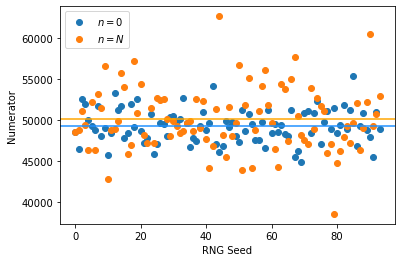

In [28]:
plt.plot(np.arange(number_of_seeds),SWAPn[:,0],'o',label=r'$n=0$')
plt.plot(np.arange(number_of_seeds),SWAPn[:,N],'o',label=r'$n=N$')
plt.axhline(np.mean(SWAPn[:,0]),color='dodgerblue')
plt.axhline(np.mean(SWAPn[:,N]),color='orange')
plt.xlabel('RNG Seed')
plt.ylabel('Numerator')
plt.legend()
plt.savefig('numerators.png')

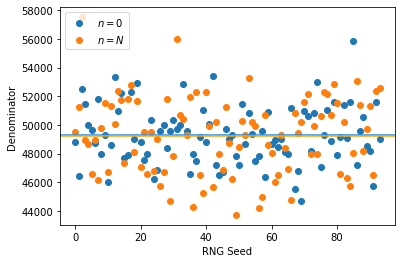

In [29]:
plt.plot(np.arange(number_of_seeds),PnSquared[:,0],'o',label=r'$n=0$')
plt.plot(np.arange(number_of_seeds),PnSquared[:,N],'o',label=r'$n=N$')
plt.axhline(np.mean(PnSquared[:,0]),color='dodgerblue')
plt.axhline(np.mean(PnSquared[:,N]),color='orange')
plt.xlabel('RNG Seed')
plt.ylabel('Denominator')
plt.legend(loc='upper left')
plt.savefig('denominators.png')

In [49]:
for n in range(N+1):
    print(f"<S2(n={n})> = {S2_mean[n]:0.6f} +/- {S2_err[n]:0.6f}")

<S2(n=0)> = -0.000321 +/- 0.006378
<S2(n=1)> = 0.023648 +/- 0.003633
<S2(n=2)> = 0.006344 +/- 0.001189
<S2(n=3)> = 0.015266 +/- 0.004119
<S2(n=4)> = -0.027901 +/- 0.084765


### $P(n)$

In [70]:
data_Pn_m2 = np.loadtxt(path+"1D_4_4_2_3.300000_1.000000_4.000000_1000_Pn-mA2_"+str(seed)+".dat")
np.mean(data_Pn_m2,axis=0)

array([  9.221, 203.696, 626.563, 207.617,   8.075])

In [71]:
data_Pn_col_sum_m2 = np.sum(data_Pn_m2,axis=0)

In [72]:
jacknifed_Pn = np.zeros(data_Pn_m2.shape)
for i in range(data_Pn_m2.shape[0]):
    data_Pn_col_sum_m2_i = data_Pn_col_sum_m2 - data_Pn_m2[i]
        
    jacknifed_Pn[i] = data_Pn_col_sum_m2_i
jacknifed_Pn /= np.sum(jacknifed_Pn,axis=1)[:,None]

In [73]:
Pn_mean = np.mean(jacknifed_Pn,axis=0)
Pn_mean /= np.sum(Pn_mean )
N_rows_Pn = jacknifed_Pn.shape[0]
Pn_err = np.std(jacknifed_Pn,axis=0)
Pn_err *= np.sqrt(N_rows_Pn-1)

In [74]:
for n in range(4+1):
    print(f'P(n={n}) = {Pn_mean[n]:0.4f} +/- {Pn_err[n]:0.4f}')

P(n=0) = 0.0087 +/- 0.0012
P(n=1) = 0.1930 +/- 0.0050
P(n=2) = 0.5938 +/- 0.0063
P(n=3) = 0.1968 +/- 0.0054
P(n=4) = 0.0077 +/- 0.0012


[0.1        0.1647549  0.27144176 0.4472136  0.7368063  1.21392446
 2.        ]
[3 4 5]


array([0.1 , 0.2 , 0.35, 0.6 , 1.  , 1.45, 2.  , 3.  , 4.  , 5.  , 6.  ])

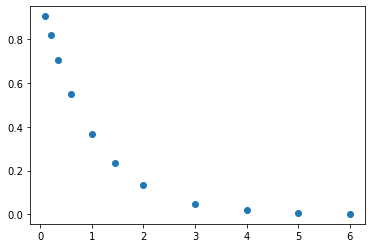

In [160]:
x1 = np.geomspace(0.1,2.0, num=7)
print(x1)
x2 = np.arange(3,6,1)
print(x2)
x5 = np.array([0.1,0.20,0.35,0.60,1.0,1.45,2.0,3.0,4.0,5.0,6.0])
# plt.plot(x1,np.exp(-x1),'o')
# plt.plot(x2,np.exp(-x2),'o')
plt.plot(x5,np.exp(-x5),'o')
x5

In [125]:
x = np.hstack((x1,x2))
x[1]=0.2
x[2]=0.3
x[3]=0.6

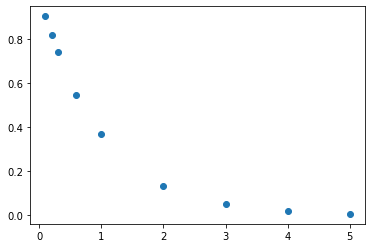

In [126]:
plt.plot(x,np.exp(-x),'o')

In [82]:
list(enumerate(x3))

[(0, 0.1),
 (1, 0.15760586001492374),
 (2, 0.2483960711104374),
 (3, 0.3914867641168864),
 (4, 0.6170060814310147),
 (5, 1.0),
 (6, 1.5326188647871062),
 (7, 2.0),
 (8, 3.806965045228559),
 (9, 6.0)]

In [79]:
# x3[5] = 1.0
x3[5] = 1.0
x3[7] = 2.0